# open mitgcm outputs, cube sphere

---

In [5]:
from xmitgcm import open_mdsdataset
import xmitgcm.utils as xgu
import subprocess
import os
import numpy as np
import dask.array as dsa
import dask
import xarray as xr

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
from dask.distributed import Client
#client = Client(scheduler_file='/nobackup/rpaberna/dask/scheduler.json')
client = Client()

In [8]:
client.restart()
client

Client Scheduler: tcp://127.0.0.1:60984 Dashboard: http://127.0.0.1:47218/status,Cluster Workers: 8 Cores: 8 Memory: 33.66 GB


In [9]:
#data_dir = '/home/datawork-lops-osi/data/mit4320/Eta/'
data_dir = '/home/datawork-lops-osi/data/mit4320/'
grid_dir = '/home/datawork-lops-osi/data/mit4320/grid/'

In [10]:
#data_dir = '/u/dmenemen/llc_4320/MITgcm/run/'
#grid_dir = '/u/dmenemen/llc_4320/grid/'

dtype = np.dtype('>f4')

# can complete 300 files in < 12 hours
#nfiles = 300
nfiles = 2

# the first available iteration is iter0=10368

delta_t = 25. # seconds
all_iters = np.arange(10368, 1310544+1, 144)
time = delta_t * all_iters
    
ds = open_mdsdataset(data_dir, grid_dir=grid_dir,
                     iters=list(all_iters)[:1], geometry='llc', read_grid=True,
                     default_dtype=np.dtype('>f4'), delta_t=delta_t,
                     ignore_unknown_vars=True)

# fix time
del ds['iter']
ds['time'] = xr.Variable(('time',), time, ds.time.attrs)
ds.time.attrs['units'] = 'seconds since 2011-09-10'
ds['iter'] = xr.Variable(('time',), all_iters)
ds

/home1/homedir5/perso/aponte/.miniconda3/envs/pangeo/lib/python3.6/site-packages/xmitgcm-0.2.1-py3.6.egg/xmitgcm/mds_store.py:721: UserWarning: Couldn't find available_diagnostics.log in /home/datawork-lops-osi/data/mit4320/. Using default version.
  "in %s. Using default version." % data_dir)
/home1/homedir5/perso/aponte/.miniconda3/envs/pangeo/lib/python3.6/site-packages/xmitgcm-0.2.1-py3.6.egg/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home1/homedir5/perso/aponte/.miniconda3/envs/pangeo/lib/python3.6/site-packages/xmitgcm-0.2.1-py3.6.egg/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:  (face: 13, i: 4320, i_g: 4320, j: 4320, j_g: 4320, k: 90, k_l: 90, k_p1: 91, k_u: 90, time: 9030)
Coordinates:
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * k_u      (k_u) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * k_l      (k_l) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * k_p1     (k_p1) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time     (time) float64 2.592e+05 2.628e+05 2.664e+05 2.7e+05 2.736e+05 ...
    XC       (face, j, i) >f4 dask.array<shape=(13, 4320, 4320), chunksize=(1, 4320, 432

In [ ]:
nz, nface, ny, nx = ds.hFacC.shape

In [11]:
index_fname = 'llc4320_compressed_level_index.nc'

try:
    ds_index = xr.open_dataset(grid_dir+index_fname)
except OSError:
    # compute and save mask indices
    print('Create llc4320_compressed_level_index.nc in grid_dir')
    ds_index = ((ds.reset_coords()[['hFacC', 'hFacW','hFacS']] > 0).sum(axis=(1, 2, 3)))
    ds_index.coords['k'] = ds.k
    ds_index.load().to_netcdf(grid_dir+index_fname)
ds_index

Create llc4320_compressed_level_index.nc in grid_dir


distributed.core - WARNING - Event loop was unresponsive in Scheduler for 1.35s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - WARNING - Event loop was unresponsive in Nanny for 1.36s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - WARNING - Event loop was unresponsive in Nanny for 1.40s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - WARNING - Event loop was unresponsive in Nanny for 1.46s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - WARNING - Event loop was unresponsive in Nanny for 1.49s.  This is often caused by long-running GIL-holding functions or moving large chu

distributed.core - WARNING - Event loop was unresponsive in Nanny for 1.09s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - WARNING - Event loop was unresponsive in Nanny for 1.08s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - WARNING - Event loop was unresponsive in Nanny for 1.08s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - WARNING - Event loop was unresponsive in Nanny for 1.08s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - WARNING - Event loop was unresponsive in Nanny for 1.08s.  This is often caused by long-running GIL-holding functions or moving large chunks 

KeyboardInterrupt: 

distributed.utils - ERROR - ('sum-aggregate-02326fb4adc3def84c36b8c810e1487e', 59)
Traceback (most recent call last):
  File "/home1/homedir5/perso/aponte/.miniconda3/envs/pangeo/lib/python3.6/site-packages/distributed/client.py", line 1354, in _gather
    st = self.futures[key]
KeyError: "('sum-aggregate-02326fb4adc3def84c36b8c810e1487e', 59)"

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home1/homedir5/perso/aponte/.miniconda3/envs/pangeo/lib/python3.6/site-packages/distributed/utils.py", line 238, in f
    result[0] = yield make_coro()
  File "/home1/homedir5/perso/aponte/.miniconda3/envs/pangeo/lib/python3.6/site-packages/tornado/gen.py", line 1055, in run
    value = future.result()
  File "/home1/homedir5/perso/aponte/.miniconda3/envs/pangeo/lib/python3.6/site-packages/tornado/concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
  File "/home1/homedir

In [ ]:
ddir = data_dir+'Eta/'

def load_level_from_3D_field(varname, inum, offset, count, mask, dtype):
    inum_str = '%010d' % inum
    fname = os.path.join(ddir, inum_str,
                         '%s.%s.data.shrunk' % (varname, inum_str))
    
    with open(fname, mode='rb') as file:
        file.seek(offset * dtype.itemsize)
        data = np.fromfile(file, dtype=dtype, count=count)
    
    data_blank = np.full_like(mask, np.nan, dtype='f4')
    data_blank[mask] = data
    data_blank.shape = mask.shape
    data_llc = xgu._reshape_llc_data(data_blank, jdim=0).compute(get=dask.get)
    data_llc.shape = (1,) + data_llc.shape
    return data_llc

def lazily_load_level_from_3D_field(varname, inum, offset, count, mask, dtype):
    return dsa.from_delayed(dask.delayed(load_level_from_3D_field)
                            (varname, inum, offset, count, mask, dtype),
                            (1, nface, ny, nx), dtype)


def make_data_variable(varname, all_iters, k=0, point='C'):
    shape = (1, nface, ny, nz)
    dtype = np.dtype('>f4')
    strides = [0,] + list(ds_index['hFac' + point].data)
    offset = strides[k]
    count = strides[k+1]
    
    # load mask from raw data
    hfac = xgu.read_mds(grid_dir + 'hFac' + point,
                        use_mmap=True, dask_delayed=False, force_dict=False)
    mask = hfac[k]>0
    mask_future = client.scatter(mask)
    
    data = dsa.concatenate([lazily_load_level_from_3D_field
                            (varname, i, offset, count, mask_future, dtype)
                            for i in all_iters], axis=0)
    
    return data

In [20]:
# hardcoded hacks 
#nz, nface, ny, nx = 90, 13, 4320, 4320
#hfac = xr.DataArray(np.ones([nface, 1, nx, ny]), dims=['face', 'time', 'i', 'j']).data
#hfac = xr.DataArray(np.ones([nface, nx, ny]), dims=['face', 'i', 'j']).data


def load_level_from_3D_field(varname, inum, offset, count, mask, dtype):
    #inum_str = '%010d' % inum
    #fname = os.path.join(ddir, inum_str,
    #                     '%s.%s.data.shrunk' % (varname, inum_str))
    fname = os.path.join(ddir, '%s.%010d.data.shrunk' % (varname, inum))
    
    with open(fname, mode='rb') as file:
        file.seek(offset * dtype.itemsize)
        data = np.fromfile(file, dtype=dtype, count=count)
    
    data_blank = np.full_like(mask, np.nan, dtype='f4')
    data_blank[mask] = data
    data_blank.shape = mask.shape
    data_llc = xgu._reshape_llc_data(data_blank, jdim=0).compute(get=dask.get)
    data_llc.shape = (1,) + data_llc.shape
    return data_llc

def lazily_load_level_from_3D_field(varname, inum, offset, count, mask, dtype):
    return dsa.from_delayed(dask.delayed(load_level_from_3D_field)
                            (varname, inum, offset, count, mask, dtype),
                            (1, nface, ny, nx), dtype)


def make_data_variable(varname, all_iters, k=0, point='C'):
    shape = (1, nface, ny, nz)
    dtype = np.dtype('>f4')
    #
    #strides = [0,] + list(ds_index['hFac' + point].data)
    #offset = strides[k]
    #count = strides[k+1]
    #
    offset = 0
    count = 1
    
    # load mask from raw data
    #hfac = xgu.read_mds(grid_dir + 'hFac' + point,
    #                    use_mmap=True, dask_delayed=False, force_dict=False)
    mask = hfac[k]>0
    mask_future = client.scatter(mask)
    
    data = dsa.concatenate([lazily_load_level_from_3D_field
                            (varname, i, offset, count, mask_future, dtype)
                            for i in all_iters], axis=0)
    
    return data

In [21]:
ds = xr.Variable(['time', 'face', 'j', 'i'], make_data_variable('Eta', [314496]))
ds.compute()

distributed.scheduler - ERROR - error from worker tcp://127.0.0.1:46612: ('Shapes do not align: %s', [(1, 332, 4320), (1, 332, 4320), (1, 332, 4320), (1, 332, 4320), (1, 332, 4320), (1, 332, 4320), (1, 332, 4320), (1, 4320, 332), (1, 4320, 332), (1, 4320, 332), (1, 4320, 332), (1, 4320, 332), (1, 4320, 332)])
distributed.utils - ERROR - ('Shapes do not align: %s', [(1, 332, 4320), (1, 332, 4320), (1, 332, 4320), (1, 332, 4320), (1, 332, 4320), (1, 332, 4320), (1, 332, 4320), (1, 4320, 332), (1, 4320, 332), (1, 4320, 332), (1, 4320, 332), (1, 4320, 332), (1, 4320, 332)])
Traceback (most recent call last):
  File "/home1/homedir5/perso/aponte/.miniconda3/envs/pangeo/lib/python3.6/site-packages/distributed/utils.py", line 238, in f
    result[0] = yield make_coro()
  File "/home1/homedir5/perso/aponte/.miniconda3/envs/pangeo/lib/python3.6/site-packages/tornado/gen.py", line 1055, in run
    value = future.result()
  File "/home1/homedir5/perso/aponte/.miniconda3/envs/pangeo/lib/python3.6/

ValueError: ('Shapes do not align: %s', [(1, 332, 4320), (1, 332, 4320), (1, 332, 4320), (1, 332, 4320), (1, 332, 4320), (1, 332, 4320), (1, 332, 4320), (1, 4320, 332), (1, 4320, 332), (1, 4320, 332), (1, 4320, 332), (1, 4320, 332), (1, 4320, 332)])

In [ ]:
plt.figure()
ds.data[0,0,:,:]

In [7]:
nz, nface, ny, nx = ds.hFacC.shape

In [8]:
index_fname = 'llc4320_compressed_level_index.nc'

try:
    ds_index = xr.open_dataset(index_fname)
except OSError:
    # compute and save mask indices
    ds_index = ((ds.reset_coords()[['hFacC', 'hFacW','hFacS']] > 0)
       .sum(axis=(1, 2, 3)))
    ds_index.coords['k'] = ds.k
    ds_index.load().to_netcdf(gdir+index_fname)
ds_index

<xarray.Dataset>
Dimensions:  (k: 90)
Coordinates:
    Z        (k) float32 ...
    drF      (k) float32 ...
    PHrefC   (k) float32 ...
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
Data variables:
    hFacC    (k) int64 ...
    hFacW    (k) int64 ...
    hFacS    (k) int64 ...

In [9]:
import xmitgcm.utils as xgu

In [10]:
ddir = '/u/dmenemen/llc_4320/compressed'

def load_level_from_3D_field(varname, inum, offset, count, mask, dtype):
    inum_str = '%010d' % inum
    fname = os.path.join(ddir, inum_str,
                         '%s.%s.data.shrunk' % (varname, inum_str))
    
    with open(fname, mode='rb') as file:
        file.seek(offset * dtype.itemsize)
        data = np.fromfile(file, dtype=dtype, count=count)
    
    
    data_blank = np.full_like(mask, np.nan, dtype='f4')
    data_blank[mask] = data
    data_blank.shape = mask.shape
    data_llc = xgu._reshape_llc_data(data_blank, jdim=0).compute(get=dask.get)
    data_llc.shape = (1,) + data_llc.shape
    return data_llc

def lazily_load_level_from_3D_field(varname, inum, offset, count, mask, dtype):
    return dsa.from_delayed(dask.delayed(load_level_from_3D_field)
                            (varname, inum, offset, count, mask, dtype),
                            (1, nface, ny, nx), dtype)


def make_data_variable(varname, all_iters, k=0, point='C'):
    shape = (1, nface, ny, nz)
    dtype = np.dtype('>f4')
    strides = [0,] + list(ds_index['hFac' + point].data)
    offset = strides[k]
    count = strides[k+1]
    
    # load mask from raw data
    hfac = xgu.read_mds(grid_dir + 'hFac' + point,
                        use_mmap=True, dask_delayed=False, force_dict=False)
    mask = hfac[k]>0
    mask_future = client.scatter(mask)
    
    data = dsa.concatenate([lazily_load_level_from_3D_field
                            (varname, i, offset, count, mask_future, dtype)
                            for i in all_iters], axis=0)
    
    return data

In [20]:
ds_subset = ds.isel(time=slice(0,1000))
ds_subset['SSS'] = xr.Variable(['time', 'face', 'j', 'i'],
                               make_data_variable('Salt', ds_subset.iter))
ds_subset[['SSS']]

<xarray.Dataset>
Dimensions:  (face: 13, i: 4320, j: 4320, time: 1000)
Coordinates:
    rA       (face, j, i) >f4 dask.array<shape=(13, 4320, 4320), chunksize=(1, 4320, 4320)>
  * time     (time) float64 2.592e+05 2.628e+05 2.664e+05 2.7e+05 2.736e+05 ...
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
    XC       (face, j, i) >f4 dask.array<shape=(13, 4320, 4320), chunksize=(1, 4320, 4320)>
    YC       (face, j, i) >f4 dask.array<shape=(13, 4320, 4320), chunksize=(1, 4320, 4320)>
    Depth    (face, j, i) >f4 dask.array<shape=(13, 4320, 4320), chunksize=(1, 4320, 4320)>
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
Data variables:
    SSS      (time, face, j, i) float32 dask.array<shape=(1000, 13, 4320, 4320), chunksize=(1, 13, 4320, 4320)>
Attributes:
    Conventions:  CF-1.6
    title:        netCDF wrapper of MITgcm MDS binary data
    source:       MITgcm
    

In [23]:
ds_subset.nbytes / 1e9

1245.080838524

In [24]:
sss_ts = ds_subset.SSS.mean(dim=('face', 'j', 'i')).persist()

In [22]:
del sss_ts

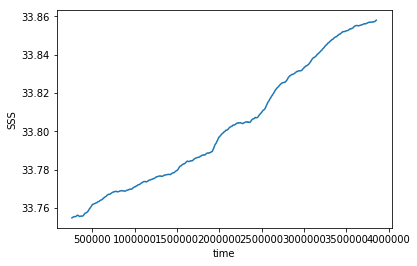

In [18]:
sss_ts.plot()